# Clustering of customers by credit card data

In this track you're asked to cluster similar customers according to their credit card history. 

## Marking criteria: 

- **2 points** : Prepare the data set and implement a basic K-means++ algorithm;
- **2 point**  : Apply elbow method & PCA to get more reliable results;
- **1 points** : Write a function  to evaluate the quality of clustering & visualize the clusters.


## 1. Basic clusterization [2 points]

### 1.1 Prepare the data [1 points]

Load `CC GENERAL.csv` into a pandas data frame and print the head (5 rows) and statistics (mean, max, min, etc. for every feature) of the frame to get a clue what the data looks like. You need to **remove one of the column** which is redundant for customer clusterization.

***Do not use any additional libraries***

In [71]:
import pandas as pd

df = pd.read_csv('CC GENERAL.csv')
print('Dataframe shape:', df.shape)
for col in df.columns:
    if col != 'CUST_ID':
        print(
            f'{col}: mean={round(df[col].mean(),3)}, max={round(df[col].max(),3)}, min={round(df[col].min(),3)}, std={round(df[col].std(),3)}, median={round(df[col].median(),3)}')
    else:
        print(col+' is a categorical feature')
print("\nUnique values in each column:")
print(df.nunique())
# we remove redundant column CUST_ID because it is a categorical feature and it has 8950 out of 8950 unique values
df = df.drop('CUST_ID', axis=1)
df.head()


Dataframe shape: (8950, 18)
CUST_ID is a categorical feature
BALANCE: mean=1564.475, max=19043.139, min=0.0, std=2081.532, median=873.385
BALANCE_FREQUENCY: mean=0.877, max=1.0, min=0.0, std=0.237, median=1.0
PURCHASES: mean=1003.205, max=49039.57, min=0.0, std=2136.635, median=361.28
ONEOFF_PURCHASES: mean=592.437, max=40761.25, min=0.0, std=1659.888, median=38.0
INSTALLMENTS_PURCHASES: mean=411.068, max=22500.0, min=0.0, std=904.338, median=89.0
CASH_ADVANCE: mean=978.871, max=47137.212, min=0.0, std=2097.164, median=0.0
PURCHASES_FREQUENCY: mean=0.49, max=1.0, min=0.0, std=0.401, median=0.5
ONEOFF_PURCHASES_FREQUENCY: mean=0.202, max=1.0, min=0.0, std=0.298, median=0.083
PURCHASES_INSTALLMENTS_FREQUENCY: mean=0.364, max=1.0, min=0.0, std=0.397, median=0.167
CASH_ADVANCE_FREQUENCY: mean=0.135, max=1.5, min=0.0, std=0.2, median=0.0
CASH_ADVANCE_TRX: mean=3.249, max=123, min=0, std=6.825, median=0.0
PURCHASES_TRX: mean=14.71, max=358, min=0, std=24.858, median=7.0
CREDIT_LIMIT: mean=44

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


You may notice that the data set is not perfectly clear. **Remove all the entries that have NaN** features or approximate these features by the similar rows. Also, make sure there are no duplicates.

Some of the columns are already normalized, while others not. To make the clusterization stable, it's recommended every feature to be **normalized**.

In [72]:
from sklearn.preprocessing import MinMaxScaler

print("Missing values before:", df.isnull().sum().sum())
df = df.dropna()
print("Missing values after:", df.isnull().sum().sum())
print("Duplicate entries before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicate entries after:", df.duplicated().sum())
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()


Missing values before: 314
Missing values after: 0
Duplicate entries before: 0
Duplicate entries after: 0


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012263,0.008210,0.000000,1.0
3,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013373,0.003204,0.000000,1.0
4,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,0.00000,0.022346,0.058431,0.027602,0.031506,0.000000,1.0


### 1.2 Clusterization of the customers [1 point]

Do **K-means++ clusterization** with an arbitrary K.

***You're allowed to use any libraries***

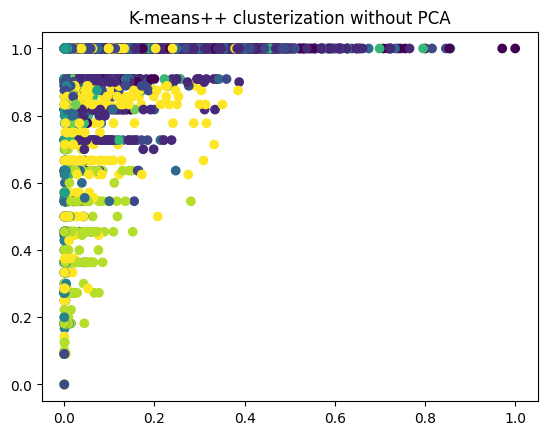

In [73]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

K = 10
kmeans = KMeans(n_clusters=K, init='k-means++', random_state=1, n_init='auto')
kmeans.fit(df_scaled)
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=kmeans.labels_)
plt.title('K-means++ clusterization without PCA')
plt.show()


## 2. Improve the result [2 points]

### 2.1 Elbow method [1 points]

Now let's find the optimal value of K. Implement the **elbow method**, choose the best K and **explain your choice** in the comments. 

***Do not use any additional libraries***

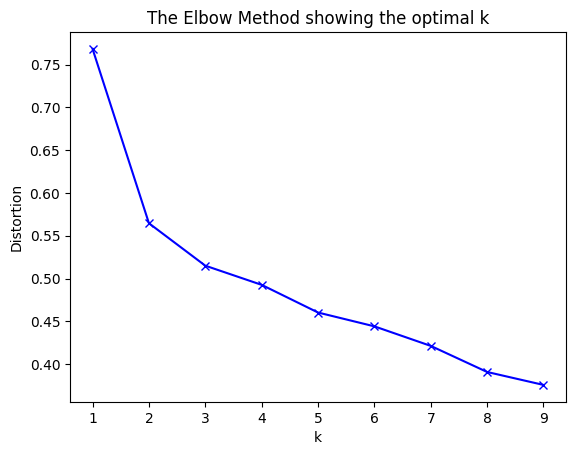

In [74]:
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np

# Your function should vizualize the values for different K's
# X     : clean data set from the previous step
# max_K : range of the K's for checking


def elbow(X: pd.DataFrame, max_K=10) -> None:
    distortions = []
    K = range(1, max_K)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, n_init='auto', random_state=1).fit(X)
        kmeanModel.fit(X)
        dist = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                   'euclidean'), axis=1)) / X.shape[0]
        distortions.append(dist)
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    return


elbow(df_scaled)


Optimal K = 2

### 2.2 PCA [1 point]

It might be useful to reduce the dimension of this data. **Apply PCA** with an arbitrary number of components on it and try to call elbow() function of the reduced data. Have you changed your choice of K_optim?

***You're allowed to use any libraries***

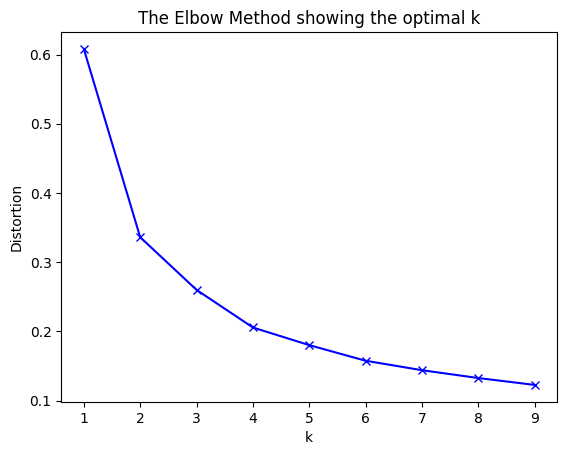

In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
new_df = df_scaled
new_df = pca.fit_transform(new_df)
distortions = elbow(new_df)


K optim remains the same: 2, however the distortion is much lower.

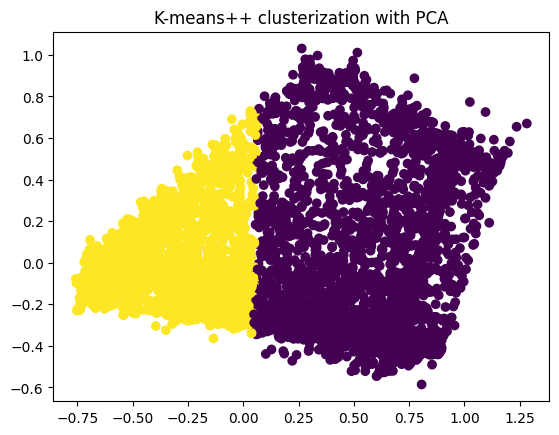

In [76]:
K_optim = 2
kmeans = KMeans(n_clusters=K_optim, init='k-means++',
                random_state=1, n_init='auto')
kmeans.fit(new_df)
plt.scatter(new_df[:, 0], new_df[:, 1], c=kmeans.labels_)
plt.title('K-means++ clusterization with PCA')
plt.show()


## 3. Evaluate the quality of clusterization [1 point]

Now you have an optimum K, let's evaluate the quality of the clusterization by ***silhouette score***. Try different values of PCA, try the evaluation without PCA, and conclude what is the best number of principal components according to the silhouette score. Explain your choice in the comments. 

Set the number of principal components to 2 and visualize the clusters. 

***You're allowed to use any libraries***

Kmeans++ silhouette score without PCA: 0.3906086472081389
Kmeans++ silhouette score with 1 PCA component: 0.7064819142855424
Kmeans++ silhouette score with 2 PCA components: 0.5815297360135036
Kmeans++ silhouette score with 3 PCA components: 0.5025173983703168
Kmeans++ silhouette score with 4 PCA components: 0.46407204735875
Kmeans++ silhouette score with 5 PCA components: 0.43262817093555483
Kmeans++ silhouette score with 6 PCA components: 0.41282717017982756
Kmeans++ silhouette score with 7 PCA components: 0.40307034937539377
Kmeans++ silhouette score with 8 PCA components: 0.39873041735571096
Kmeans++ silhouette score with 9 PCA components: 0.39586246364106903
Best number of principal components: 1


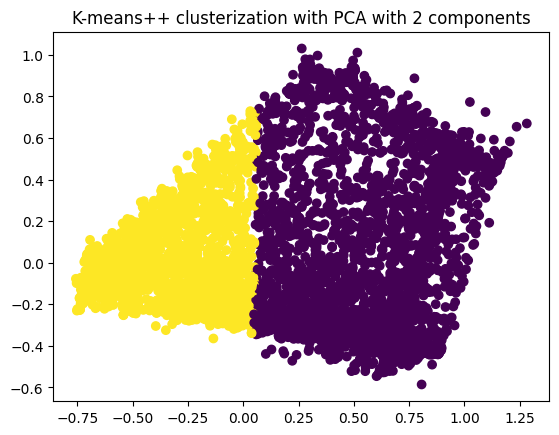

In [77]:
# Write your code here

# use_pca :  True, if PCA is used, False for Kmeans++ on vanilla data
# n_comp  :  number of principal components for PCA, if it's used
# X       :  clear input data
# silh_sc : silhouette score
# Now you have an optimum K, let's evaluate the quality of the clusterization by ***silhouette score***. Try different values of PCA, try the evaluation without PCA, and conclude what is the best number of principal components according to the silhouette score. Explain your choice in the comments.
# Set the number of principal components to 2 and visualize the clusters.
from sklearn.metrics import silhouette_score


def score(use_pca: bool, n_comp: int, X: pd.DataFrame) -> float:
    # Note: use K_optim for the number of clusters
    silh_sc = 0
    if use_pca:
        pca = PCA(n_components=n_comp)
        X = pca.fit_transform(X)
    kmeans = KMeans(n_clusters=K_optim, init='k-means++',
                    random_state=1, n_init="auto")
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    silh_sc = silhouette_score(X, y_kmeans)
    # print("Silhouette score:", silh_sc)
    # if n_comp == 2 and use_pca:
    #     plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
    #     plt.show()
    return silh_sc


df = pd.read_csv('CC GENERAL.csv')
df = df.drop('CUST_ID', axis=1)
df = df.dropna()
df = df.drop_duplicates()
scaler = MinMaxScaler()
dict = {}
df_scaled = scaler.fit_transform(df)
dict[0] = score(False, 0, df_scaled)
print("Kmeans++ silhouette score without PCA:", score(False, 2, df_scaled))
for i in range(1, 10):
    if i != 1:
        print(
            f"Kmeans++ silhouette score with {i} PCA components:", score(True, i, df_scaled))
    else:
        print(
            f"Kmeans++ silhouette score with {i} PCA component:", score(True, i, df_scaled))
    dict[i] = score(True, i, df_scaled)
best_n_comp = max(dict, key=dict.get)
print("Best number of principal components:", best_n_comp)
pca = PCA(n_components=2)
df_scaled = pca.fit_transform(df_scaled)
kmeans = KMeans(n_clusters=K_optim, init='k-means++',
                random_state=1, n_init="auto")
kmeans.fit(df_scaled)
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans.labels_)
plt.title('K-means++ clusterization with PCA with 2 components')
plt.show()


### References

https://en.wikipedia.org/wiki/Silhouette_(clustering)